<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/Lecture_11___Experimental_Data_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Validação Cruzada: Avaliando a Capacidade de Generalização de um Modelo**

A escolha da complexidade adequada para um modelo é fundamental ao buscar ajustar uma curva aos dados. Quando há uma teoria que explica os dados utilizados, ela pode servir como base para definir o grau do modelo. Porém, na ausência de uma teoria prévia, é essencial utilizar técnicas de validação cruzada para avaliar a performance de modelos com diferentes graus de complexidade.

### **Tipos de Validação Cruzada**

1. **Leave-One-Out (LOO)**  
   - Cada exemplo é deixado de fora uma vez: o modelo é treinado nos demais e testado no exemplo excluído.  
   - Vantagem: utiliza praticamente todo o conjunto de dados para treinamento.  
   - Limitação: pode ser computacionalmente custoso para conjuntos de dados grandes.

2. **K-Fold Cross-Validation**  
   - Os dados são divididos em \(k\) subconjuntos (ou *folds*).  
   - O modelo é treinado \(k\) vezes, cada vez deixando um subconjunto de fora para teste enquanto os demais são usados para treinamento.  
   - Vantagem: equilíbrio entre custo computacional e precisão da avaliação.  
   - Recomendação: um valor comum para \(k\) é 5 ou 10.

3. **Amostragem Aleatória Repetida** (*Repeated Random Sampling*)  
   - Divide os dados aleatoriamente em conjuntos de treinamento e teste, repetindo o processo várias vezes.  
   - Vantagem: fornece uma avaliação robusta ao repetir a divisão várias vezes.  
   - Limitação: pode introduzir variabilidade, dependendo das divisões feitas.

A validação cruzada é uma ferramenta poderosa para se avaliar a capacidade de generalização de um modelo, evitando *overfitting* (superajuste). Escolher o método de validação cruzada mais adequado depende do tamanho do conjunto de dados e dos recursos computacionais disponíveis.

In [53]:
import numpy as np
import pylab
import random
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
class tempDatum(object):
    """
    Representa um registro de dados de temperatura.

    Atributos:
    - self.high: Temperatura máxima registrada.
    - self.year: Ano da temperatura registrada.
    """
    def __init__(self, s):
        """
        Inicializa os atributos a partir de uma string formatada.
        A string deve conter informações separadas por vírgulas.

        Parâmetro:
        - s: Uma string contendo dados formatados, ex.: "cidade,temperatura,ano".
        """
        info = s.split(',')
        self.high = float(info[1])  # Extrai a temperatura máxima
        self.year = int(info[2][0:4])  # Extrai o ano (primeiros 4 caracteres)

    def getHigh(self):
        """Retorna a temperatura máxima."""
        return self.high

    def getYear(self):
        """Retorna o ano do registro."""
        return self.year

In [56]:
def getTempData(fileName=None):
    inFile = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/temperatures.csv")
    data = []  # Lista para armazenar os objetos tempDatum
    for index, row in inFile.iterrows():
        try:
            # Cria um objeto tempDatum para cada linha e adiciona à lista
            temp_data = tempDatum(f"{row['CITY']},{row['TEMP']},{row['DATE']}")
            data.append(temp_data)
        except:
            continue  # Ignora linhas mal formatadas ou vazias

    return data  # Retorna a lista de objetos tempDatum

# Chama a função para obter os dados
data = getTempData()

# Extrai os dados de temperatura e ano
temperaturas = [item.getHigh() for item in data]
anos = [item.getYear() for item in data]

# Imprime os dados extraídos (opcional)
print("Temperaturas:", temperaturas[:10]) # Mostra as primeiras 10 temperaturas
print("Anos:", anos[:10]) # Mostra os primeiros 10 anos

# Agora você pode usar as listas 'temperaturas' e 'anos' conforme necessário
# por exemplo, criar um DataFrame pandas:
df = pd.DataFrame({'Temperatura': temperaturas, 'Ano': anos})
print(df.head())

Temperaturas: [3.1, 0.55, 0.0, 4.45, 8.35, 6.7, 9.7, 7.2, 9.45, 10.3]
Anos: [1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961]
   Temperatura   Ano
0         3.10  1961
1         0.55  1961
2         0.00  1961
3         4.45  1961
4         8.35  1961


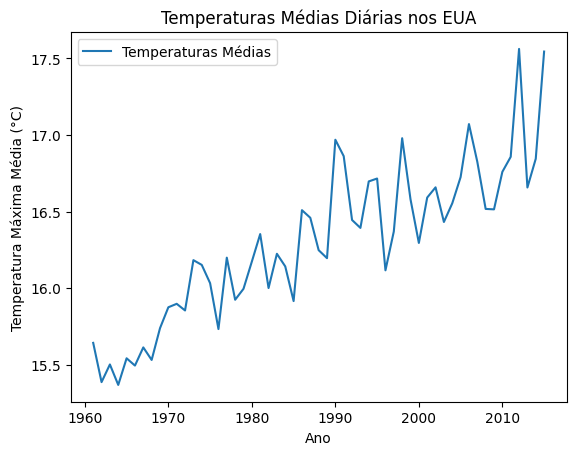

In [57]:
def getYearlyMeans(data):
    """
    Calcula as médias anuais de temperatura a partir dos dados fornecidos.

    Parâmetro:
    - data: Uma lista de objetos `tempDatum`.

    Retorna:
    - Um dicionário onde as chaves são anos e os valores são as médias anuais.
    """
    years = {}  # Dicionário para armazenar os dados por ano

    for d in data:
        try:
            # Adiciona a temperatura ao ano correspondente
            years[d.getYear()].append(d.getHigh())
        except:
            # Cria uma nova entrada para o ano, se necessário
            years[d.getYear()] = [d.getHigh()]

    # Calcula a média de temperatura para cada ano
    for y in years:
        years[y] = sum(years[y]) / len(years[y])
    return years

# Processamento dos dados e plotagem
data = getTempData()  # Lê os dados do arquivo CSV
years = getYearlyMeans(data)  # Calcula as médias anuais

xVals, yVals = [], []  # Listas para armazenar os valores de X (anos) e Y (médias)

# Prepara os valores para o gráfico
for e in years:
    xVals.append(e)  # Adiciona o ano
    yVals.append(years[e])  # Adiciona a média anual correspondente

# Cria o gráfico
if len(xVals) > 0 and len(yVals) > 0:
    plt.plot(xVals, yVals, label="Temperaturas Médias")
    plt.xlabel('Ano')
    plt.ylabel('Temperatura Máxima Média (°C)')
    plt.title('Temperaturas Médias Diárias nos EUA')
    plt.legend()
    plt.show()
else:
    print("Erro: xVals ou yVals está vazio.")

In [62]:
def splitData(xVals, yVals):
    """
    Divide os dados em conjuntos de treino e teste de forma aleatória.

    Args:
    - xVals: Lista de valores de entrada (eixo X).
    - yVals: Lista de valores correspondentes de saída (eixo Y).

    Retorna:
    - trainX: Lista de valores de entrada para o conjunto de treino.
    - trainY: Lista de valores de saída para o conjunto de treino.
    - testX: Lista de valores de entrada para o conjunto de teste.
    - testY: Lista de valores de saída para o conjunto de teste.
    """
    toTrain = random.sample(range(len(xVals)), len(xVals) // 2)
    trainX, trainY, testX, testY = [], [], [], []
    for i in range(len(xVals)):
        if i in toTrain:
            trainX.append(xVals[i])
            trainY.append(yVals[i])
        else:
            testX.append(xVals[i])
            testY.append(yVals[i])
    return trainX, trainY, testX, testY

def rSquared(observed, predicted):
    """
    Calcula o R² (coeficiente de determinação).
    """
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/np.var(observed))

# Configuração dos parâmetros
numSubsets = 10  # Número de subconjuntos para treino/teste
dimensions = (1, 2, 3)  # Dimensionalidade dos modelos de regressão
rSquares = {}  # Armazena os valores de R² para cada dimensionalidade
for d in dimensions:
    rSquares[d] = []

# Executa a validação cruzada
for _ in range(numSubsets):
    trainX, trainY, testX, testY = splitData(xVals, yVals)
    for d in dimensions:
        # Ajusta um modelo polinomial de grau d aos dados de treino
        model = pylab.polyfit(trainX, trainY, d)
        estVals = pylab.polyval(model, trainX)  # Previsões para o treino
        estVals = pylab.polyval(model, testX)  # Previsões para o teste
        rSquares[d].append(rSquared(testY, estVals))  # Calcula R² e armazena

# Calcula e imprime as métricas de R²
print("Média dos R-quadrados para dados de teste")
for d in dimensions:
    mean = round(sum(rSquares[d]) / len(rSquares[d]), 4)
    sd = round(np.std(rSquares[d]), 4)
    print(f'Para dimensionalidade {d}, média (𝜇) de R² = {mean}, desvio padrão (𝜎) de R²  = {sd}')

# Exibe os valores de R² para o grau 1
print(rSquares[1])


Média dos R-quadrados para dados de teste
Para dimensionalidade 1, média (𝜇) de R² = 0.6963, desvio padrão (𝜎) de R²  = 0.0927
Para dimensionalidade 2, média (𝜇) de R² = 0.6865, desvio padrão (𝜎) de R²  = 0.0939
Para dimensionalidade 3, média (𝜇) de R² = 0.6582, desvio padrão (𝜎) de R²  = 0.0623
[0.6482122863568125, 0.8091419622532888, 0.7433486642936591, 0.797185357041963, 0.5638644923960713, 0.8167233079311395, 0.7117592987241043, 0.6860647410579583, 0.5434590699257478, 0.6433186296510162]


Com base nos resultados apresentados, o modelo linear (dimensionalidade 1) é o melhor para modelar os dados de temperatura.